# Lab Random Forests

Instructions:
Apply the Random Forests algorithm but this time only by upscaling the data using SMOTE. \
Note that since SMOTE works on numerical data only, we will first encode the categorical variables in this case.

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

# Pre-Processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# Model
from sklearn.linear_model import LogisticRegression

# Metric libraries
from sklearn.metrics import accuracy_score, plot_confusion_matrix, cohen_kappa_score

# Imbalance Libraries
from imblearn.over_sampling import SMOTE

In [2]:
# Creating dataframe 'churnData'
churndata = pd.read_csv('Customer-Churn.csv')
churndata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
# Cleaning headers to all lower case
churndata.columns = churndata.columns.str.lower()
print(churndata.columns)

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [4]:
# Checking datatypes of all columns
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   object 
 15  churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
# Converting totalcharges from object to numeric
churndata['totalcharges'] = pd.to_numeric(churndata['totalcharges'], errors = 'coerce')

In [6]:
# Checking to make sure conversion worked
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7032 non-null   float64
 15  churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [7]:
# Checking for null values in dataframe
churndata.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

- Notice 11 NaN values in totalcharges column. I will use the mean of 'totalcharges' to fill these out

In [8]:
# Creating variable 'mean' and will be mean of totalcharges feature
# Will use fillna function to replace NaN values
mean = np.mean(churndata['totalcharges'])

churndata['totalcharges'] = churndata['totalcharges'].fillna(mean)

churndata.isna().sum() # Checking to make sure NaN's have been removed

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [12]:
# Splitting df to categorical and numerical
churnNum = churndata.select_dtypes(include = 'number')
churnCat = churndata.select_dtypes(include = 'object').drop(['churn'], axis =1)
churnY = churndata['churn']

# PreProcessing - Sclaing Numerical column

In [13]:
# Using StandarScaler & Normalizer to scale data (Doing both now to see if there is any significant change) 
scaler = StandardScaler()
scaler.fit(churnNum)
churnNums = scaler.transform(churnNum)
churnNums = pd.DataFrame(churnNums, columns = churnNum.columns) 

churnNums

,seniorcitizen,tenure,monthlycharges,totalcharges
0,-0.439916,-1.277445,-1.160323,-0.994971
1,-0.439916,0.066327,-0.259629,-0.173876
2,-0.439916,-1.236724,-0.362660,-0.960399
3,-0.439916,0.514251,-0.746535,-0.195400
4,-0.439916,-1.236724,0.197365,-0.941193
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.129281
7039,-0.439916,1.613701,1.277533,2.242808
7040,-0.439916,-0.870241,-1.168632,-0.855182
7041,2.273159,-1.155283,0.320338,-0.872777


# PreProcessing - Dummifying Categorical Columns

In [14]:
# Using pd.GetDummies to dummify categorical columns

churnCat = pd.get_dummies(churnCat)
churnCat

,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,onlinesecurity_No,onlinesecurity_No internet service,...,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year
0,1,0,0,1,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,1,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,1,1,0,1,0,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
7039,1,0,0,1,0,1,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
7040,1,0,0,1,0,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
7041,0,1,0,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0


In [15]:
# Merging categorical and numerical

churndata2 = pd.concat([churnCat,churnNums, churnY], axis = 1)
churndata2

,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,onlinesecurity_No,onlinesecurity_No internet service,...,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,seniorcitizen,tenure,monthlycharges,totalcharges,churn
0,1,0,0,1,1,0,1,0,1,0,...,0,0,1,0,0,-0.439916,-1.277445,-1.160323,-0.994971,No
1,0,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,-0.439916,0.066327,-0.259629,-0.173876,No
2,0,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,-0.439916,-1.236724,-0.362660,-0.960399,Yes
3,0,1,1,0,1,0,1,0,0,0,...,0,0,0,1,0,-0.439916,0.514251,-0.746535,-0.195400,No
4,1,0,1,0,1,0,0,1,1,0,...,0,0,1,0,0,-0.439916,-1.236724,0.197365,-0.941193,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,0,1,0,0,...,0,1,0,1,0,-0.439916,-0.340876,0.665992,-0.129281,No
7039,1,0,0,1,0,1,0,1,1,0,...,0,1,0,1,0,-0.439916,1.613701,1.277533,2.242808,No
7040,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,-0.439916,-0.870241,-1.168632,-0.855182,No
7041,0,1,0,1,1,0,0,1,1,0,...,0,0,1,0,0,2.273159,-1.155283,0.320338,-0.872777,Yes


# Running the Logistics Regression Model

In [16]:
# Splitting the dataset into train and test

X = churndata2.drop(['churn'], axis = 1)
y = churndata2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

The Kappa of your model is: 0.48
The accuracy of your model is:  0.8059630856601988


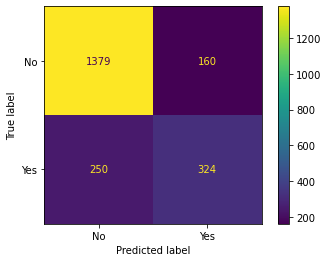

In [17]:
# Running the Logistic Regression Model 
clf = LogisticRegression(random_state = 42, max_iter = 500).fit(X_train, y_train)
predictions = clf.predict(X_test)

# Model Metrics using cohen_kappa and accuracy score
plot_confusion_matrix(clf, X_test, y_test)
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))
print("The accuracy of your model is: ", accuracy_score(y_test, predictions))


In [18]:
# Checking for imbalance of the model
churndata['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

- Decent accuracy score of the model but low Kappa. Checking for the imbalance you can see that churn is heavily favoured to No's in the model

# Imbalance Fixes - SMOTE

In [19]:
# Creating df for SMOTE specifically


X_smote = pd.DataFrame(X, columns = churnNum.columns)
y_smote = pd.DataFrame(y)
churnsmt = pd.concat([X_smote,y_smote], axis = 1) # 'churnsmt' to indicate this will be used specifically for SMOTE

# Creating 'smote' variable with SMOTE function
smote = SMOTE()
ys = churnsmt['churn']
Xs = churnsmt.drop(['churn'], axis = 1)

# fitting smote on Xs and Ys
X_sm, y_sm = smote.fit_sample(Xs, ys)

unique, counts = np.unique(y_sm, return_counts = True)

print(np.asarray((unique, counts)).T)

[['No' 5174]
 ['Yes' 5174]]


In [20]:
# splitting the churnsmt into test and train
Xse_train, Xse_test, yse_train, yse_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 42)

The Kappa of your model is: 0.48
The accuracy of your model is:  0.7391304347826086


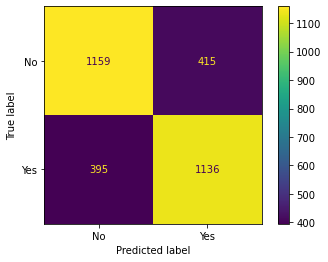

In [21]:
# Running Logistic Regression on SMOTE data
clf = LogisticRegression(random_state = 42, max_iter = 500).fit(Xse_train, yse_train)
predictions = clf.predict(Xse_test)

# Model Metrics using cohen_kappa and accuracy score
plot_confusion_matrix(clf, Xse_test, yse_test)
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(yse_test, predictions)))
print("The accuracy of your model is: ", accuracy_score(yse_test, predictions))

#Note
- Increase in both accuracy score (0.75) and kappa score( compared to all previous models

# SMOTE - Running Random Forests Classifier

In [24]:
# Importing Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import t, norm

In [25]:
# Running Random Forest Classifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print("The accuracy of the Random forest is: {:4.2f}".format(clf.score(X_test, y_test)))
print()

alpha = 0.05
K = 10
# For cross validation
clf = RandomForestClassifier(max_depth=2, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)

if (K < 30):
    t_critical = abs(t.ppf(alpha, K-1))
    interval = t_critical*(np.std(cross_val_score(clf, X_train, y_train, cv=10))/np.sqrt(K))
else:
    z_critical = abs(norm.ppf(1-alpha/2))
    interval = z_critical*(np.std(cross_val_score(clf, X_train, y_train, cv=10))/np.sqrt(K)) 
print("The accuracy of the Random Forest model (CV witk K=10) is: {:4.2f} +/- {:4.2f}".format(np.mean(cross_val_scores),interval))

The accuracy of the Random forest is: 0.73

The accuracy of the Random Forest model (CV witk K=10) is: 0.74 +/- 0.01
